<a href="https://colab.research.google.com/github/hadibadri/Projects/blob/main/Neural_Network_Classification_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Classification Problems using a Rehersal Dataset.

In [ ]:
# Importing the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
!pip install --upgrade keras
!pip install keras-datasets
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.4 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.4
    Uninstalling keras-3.0.4:
      Successfully uninstalled keras-3.0.4
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


## Creating Data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make a thousand examples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples,
                    noise = 0.03, random_state = 42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:12]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0])

##### Our data is little hard to understand right now, so it would be better to visualize it!

In [ ]:
circles = pd.DataFrame({"X0" : X[:, 0], "X1": X[:, 1], "Label" : y})
circles.head()

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


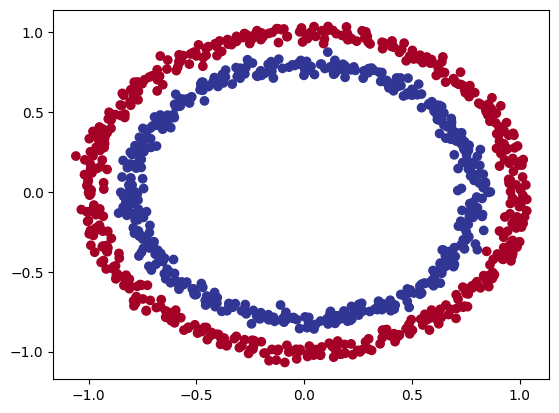

In [ ]:
# Visualize with a plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)

## Input and Output Shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

## Steps in Modelling

In [ ]:
tf.random.set_seed(42)

# Creating base Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compiling the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.SGD(), metrics = ["accuracy"])

# Fitting the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 4s 3ms/step - loss: 4.3266 - accuracy: 0.4710
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 3.9399 - accuracy: 0.5110
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 3.3038 - accuracy: 0.5210
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.8437 - accuracy: 0.4890
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7176 - accuracy: 0.4920


### Improving the base model

In [ ]:
tf.random.set_seed(42)

# Creating base Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compiling the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.SGD(), metrics = ["accuracy"])

# Fitting the model
model_1.fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 8ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [ ]:
# Adding another layer
tf.random.set_seed(42)

# Creating base Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.SGD(), metrics = ["accuracy"])

# Fitting the model
model_2.fit(X, y, epochs = 100, verbose = 0)

# Evaluate the model
model_2.evaluate(X, y)


32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932536959648132, 0.5]

#### Further Improving the Model

In [ ]:
# Setting Random Seed
tf.random.set_seed(42)

# Creating a Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

# Fitting the Model
model_3.fit(X, y, epochs = 100, verbose = 0)

# Evaluate the Model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5090


[0.7037412524223328, 0.5090000033378601]

#### To visualise our model's prediction, let's create a function `plot_decision_boundary()`


In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the Decision boundary created by a Model predicting on X.
  """
  # Define the axis and create Mesh Grid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stacks 2D arrays together.

  # Make Predictions
  y_pred = model.predict(x_in)

  # Check Multiclass
  if len(y_pred[0]) > 1:
    print("Doing Multiclass Classification")
    # We have to reshape the predictions to get them ready
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("Doing Binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463376,
 -1.1677683182718437,
 1.1360036756154803)

313/313 [==============================] - 1s 1ms/step
Doing Binary Classification


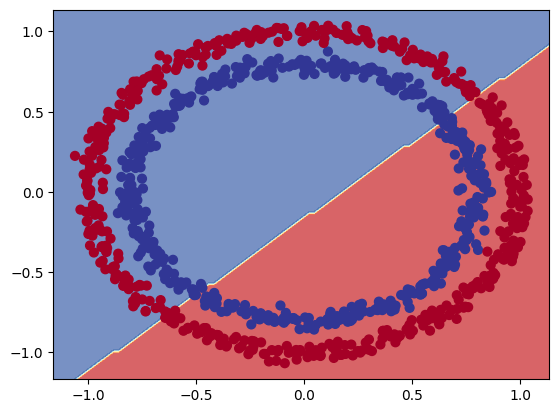

In [ ]:
# Check out the predcitions our model is making
plot_decision_boundary(model_3, X=X, y=y)

In [ ]:
# Let's see if our model could be used for a regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split the data into training and test sets
X_reg_train = X_regression[:160]
X_reg_test = X_regression[160:]
y_reg_train = y_regression[:160]
y_reg_test = y_regression[160:]

# Fit our model
model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "dense_4" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (32,)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(32,), dtype=int32)
      • training=True
      • mask=None


In [ ]:
tf.random.set_seed(42)

# Create Model_3 again
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = [1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(), metrics = ["mae"])

model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 457.3130 - mae: 457.3130
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 340.6935 - mae: 340.6935
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 218.2626 - mae: 218.2626
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 94.6095 - mae: 94.6095
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 62.7391 - mae: 62.7391
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 87.7373 - mae: 87.7373
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 65.7478 - mae: 65.7478
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9076 - mae: 45.9076
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 50.5862 - mae: 50.5862
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 43.4078 - mae: 43.4078
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


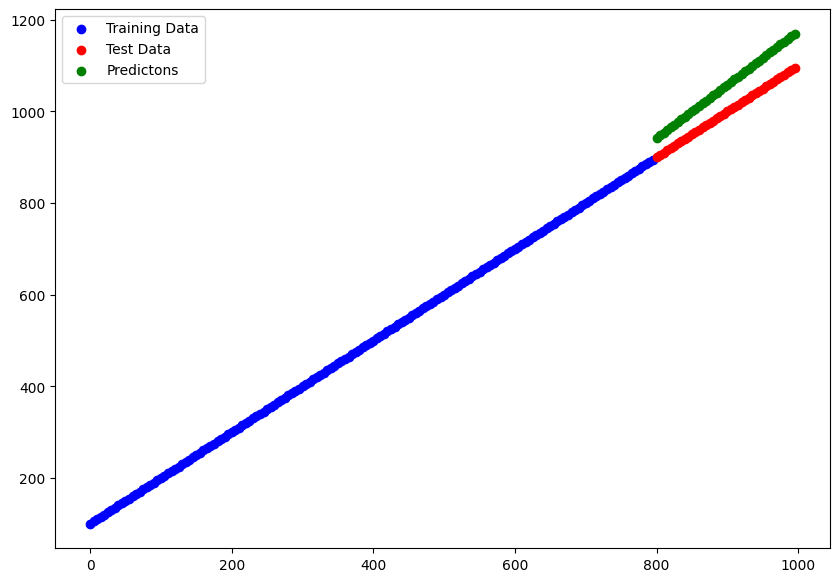

In [ ]:
# mAKE PREDICTIONS
y_reg_preds = model_3.predict(X_reg_test)

# Let's plot the model's predictions
plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Training Data")
plt.scatter(X_reg_test, y_reg_test, c = "r", label = "Test Data")
plt.scatter(X_reg_test, y_reg_preds, c = "g", label = "Predictons")
plt.legend()

##### Since the classification problem is not linear therefore, we should've added non-linearity to the model t make more accurate predictions.

### The missing Piece : Non-Linearity

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(lr = 0.001), metrics = ["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2750 - accuracy: 0.4550
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2108 - accuracy: 0.4550
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1128 - accuracy: 0.4570
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0701 - accuracy: 0.4590
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0218 - accuracy: 0.4620
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9175 - accuracy: 0.4640
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8426 - accuracy: 0.4650
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8069 - accuracy: 0.4670
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7268 - accuracy: 0.4680
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7182 - accuracy: 0.4690
Epoch 11/

313/313 [==============================] - 1s 3ms/step
Doing Binary Classification


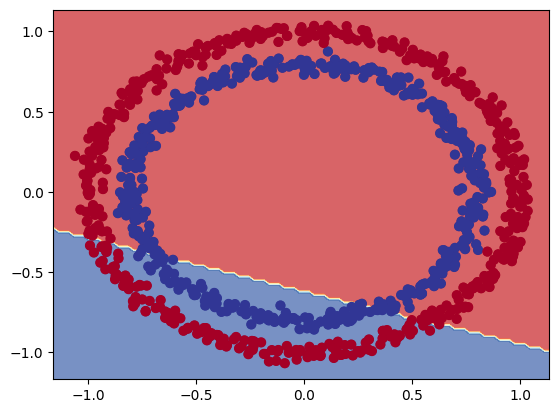

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu);

# Check the decision boundary
plot_decision_boundary(model_4, X= X, y = y)

In [ ]:
# Changing the activation to relu

tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
 tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

# Compiling the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = "accuracy")

# Fitting the model
history = model_5.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.4024 - accuracy: 0.4710
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3695 - accuracy: 0.4680
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3381 - accuracy: 0.4670
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3100 - accuracy: 0.4680
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3005 - accuracy: 0.4680
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2940 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2884 - accuracy: 0.4660
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2831 - accuracy: 0.4650
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2370 - accuracy: 0.4640
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1929 - accuracy: 0.4670
Epoch 11/

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras. Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

# Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(lr = 0.001), metrics = ["accuracy"])

# Fit the model
model_6.fit(X, y, epochs = 250)

Epoch 1/250
32/32 [==============================] - 3s 4ms/step - loss: 0.6985 - accuracy: 0.5140
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.4990
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4920
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4810
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4890
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4630
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.4800
Epoch 8/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.4850
Epoch 9/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.5020
Epoch 10/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5050
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.3099 - accuracy: 0.8920


[0.30988365411758423, 0.8920000195503235]

313/313 [==============================] - 1s 2ms/step
Doing Binary Classification


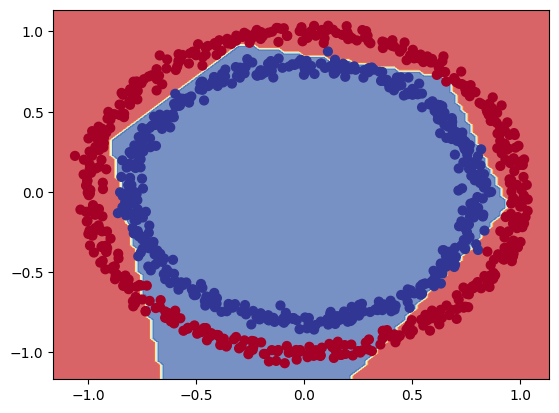

In [ ]:
# Visualize Visualize Visualize
plot_decision_boundary(model_6, X = X, y = y)

In [ ]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

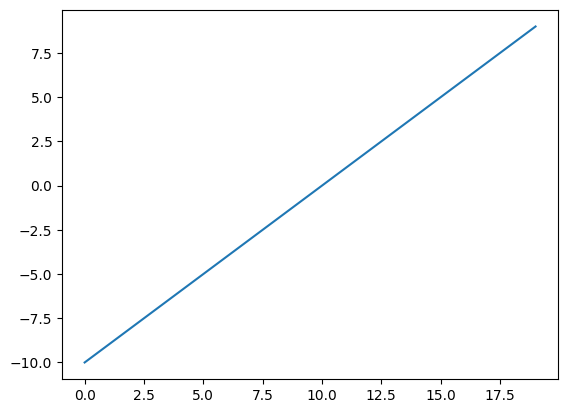

In [ ]:
# Visualise our toy tensor
plt.plot(A)

In [ ]:
# Applying sigmoid activation function directly to A
def sigmoid(x):
  return 1/(1+tf.exp(-x))
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

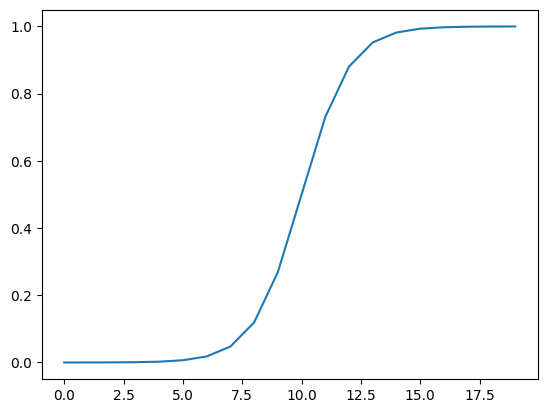

In [ ]:
# Plot them
plt.plot(sigmoid(A))

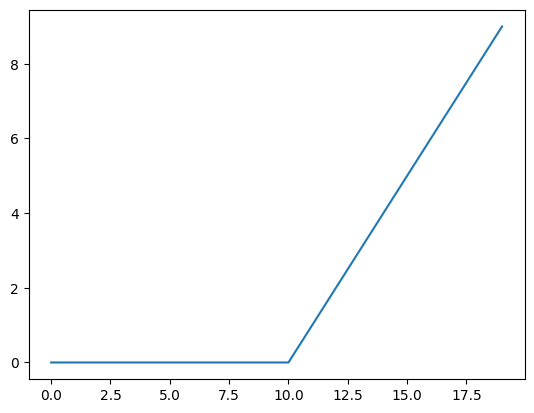

In [ ]:
def relu(x):
  return tf.maximum(0, x)

# Plot it!
plt.plot(relu(A))

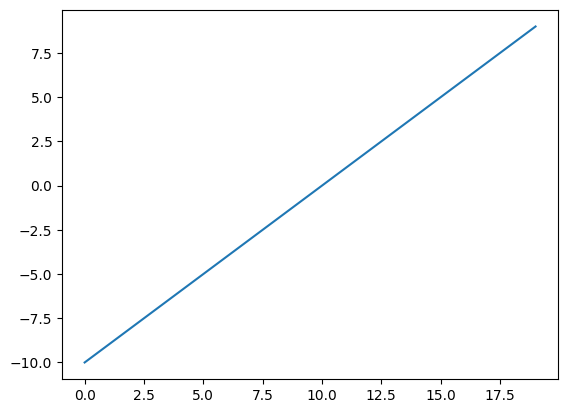

In [ ]:
# Let's try linear activation function
def linear(x):
  return x

plt.plot(linear(A))

## Evaluating and Improving our Classification

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Create a model to fit on training data
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compiling the Model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(lr = 0.01), metrics = ["accuracy"])

# Fitting the Model
history = model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
25/25 [==============================] - 1s 3ms/step - loss: 0.6892 - accuracy: 0.5025
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.4988
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5063
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5275
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5612
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.5950
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.5888
Epoch 8/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5638
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.5575
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.5550
Epoch 11/

In [ ]:
# Evaluating the Model
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1209 - accuracy: 0.9850


[0.12094313651323318, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
Doing Binary Classification


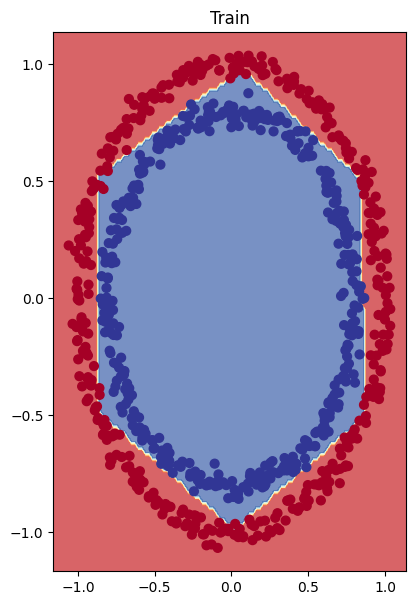

In [ ]:
# Plotting The decision boundary
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)

## Plot the loss (or training) curves

In [ ]:
# Convert history object in a DataFrame
pd.DataFrame(history.history).head()

,loss,accuracy
0,0.689235,0.50250
1,0.685431,0.49875
2,0.683032,0.50625
3,0.681474,0.52750
4,0.680192,0.56125


Text(0, 0.5, 'Accuracy')

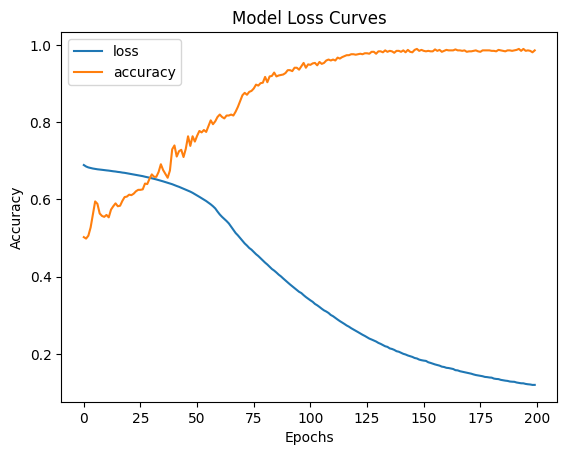

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

## Finding the best learning rate

To find the ideal Learning Rate (where the loss decreases the most)
using following steps -
* A learning rate **callback** - as an extra piece of functionality , you can add to the model *while* it's training.
* We could use another model.

In [ ]:
tf.random.set_seed(42)

# Create a model
Model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the Model
Model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the Model
history_1 = Model.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6943 - accuracy: 0.4787 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4800 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4787 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4775 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4762 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4725 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4750 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4737 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='Epochs'>

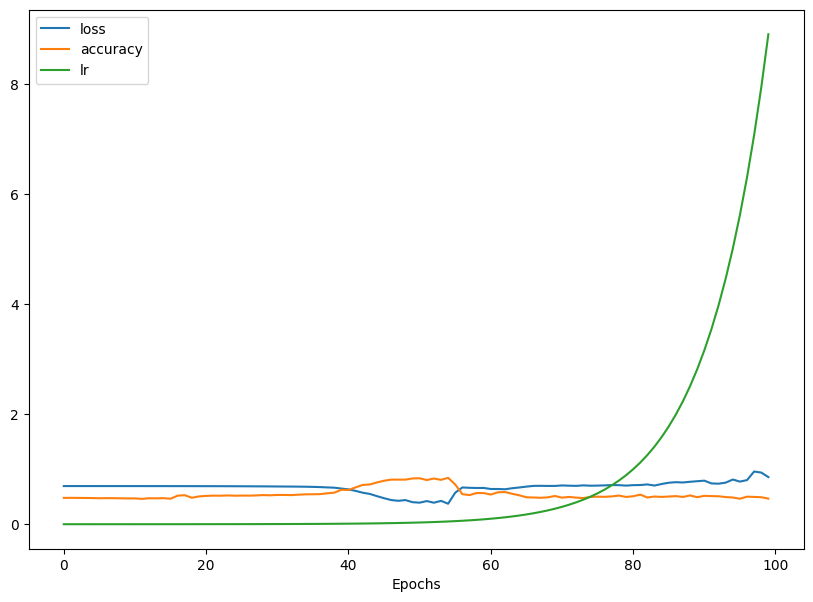

In [ ]:
# Check it out
pd.DataFrame(history_1.history).plot(figsize = (10, 7), xlabel = "Epochs")

In [ ]:
# Plot learning rate values vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))

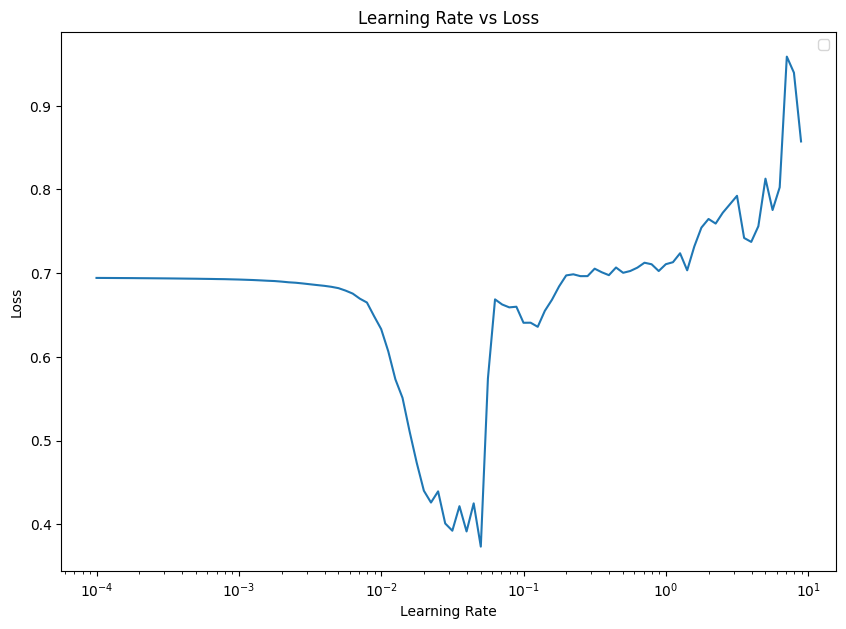

In [ ]:
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_1.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.legend()

In [ ]:
# Example of other learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher learning rate
tf.random.set_seed(42)

# Create a model
Model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compiling the Model
Model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(lr = 0.02), metrics = ["accuracy"])

# Fitting the Model
history_n = Model.fit(X_train, y_train, epochs = 115)

Epoch 1/115
25/25 [==============================] - 1s 3ms/step - loss: 0.7133 - accuracy: 0.5000
Epoch 2/115
25/25 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5050
Epoch 3/115
25/25 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.5038
Epoch 4/115
25/25 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.5013
Epoch 5/115
25/25 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5050
Epoch 6/115
25/25 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5063
Epoch 7/115
25/25 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5088
Epoch 8/115
25/25 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5088
Epoch 9/115
25/25 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5200
Epoch 10/115
25/25 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5325
Epoch 11/

In [ ]:
# Evaluate The new Model
Model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3688 - accuracy: 0.9350


[0.36877936124801636, 0.9350000023841858]

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1209 - accuracy: 0.9850


[0.12094313651323318, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
Doing Binary Classification
313/313 [==============================] - 1s 2ms/step
Doing Binary Classification


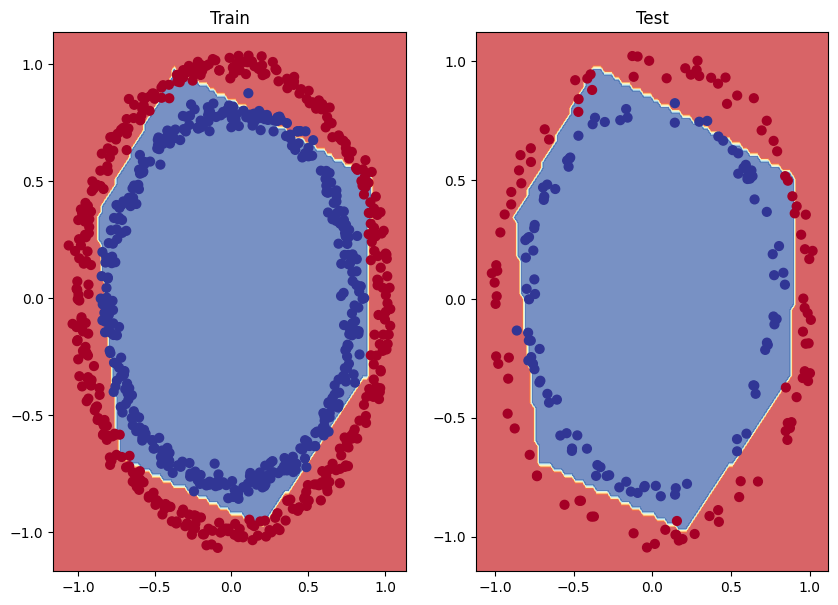

In [ ]:
# Plot the decision boundaries for training and test set
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1) # 1 row, 2 column, 1st section
plt.title("Train")
plot_decision_boundary(Model, X = X_train, y = y_train)
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd section
plt.title("Test")
plot_decision_boundary(Model, X = X_test, y = y_test)

In [ ]:
# Check the accuracy of our Model
loss, accuracy = Model.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.3688 - accuracy: 0.9350
Model loss on the test set: 0.36877936124801636
Model accuracy on the test set: 93.50%


#### Let's check out Confussion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = Model.predict(X_test)

# Create a Confusion Matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 5ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[0.7250716 ],
       [0.80087703],
       [0.5152905 ],
       [0.7373031 ],
       [0.21316181],
       [0.19320466],
       [0.6676915 ],
       [0.4987615 ],
       [0.7869154 ],
       [0.5389881 ]], dtype=float32)

In [ ]:
# Converting Prediction Probabilities to binary format
tf.round(y_preds)

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
 

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))

array([[93,  8],
       [ 5, 94]])

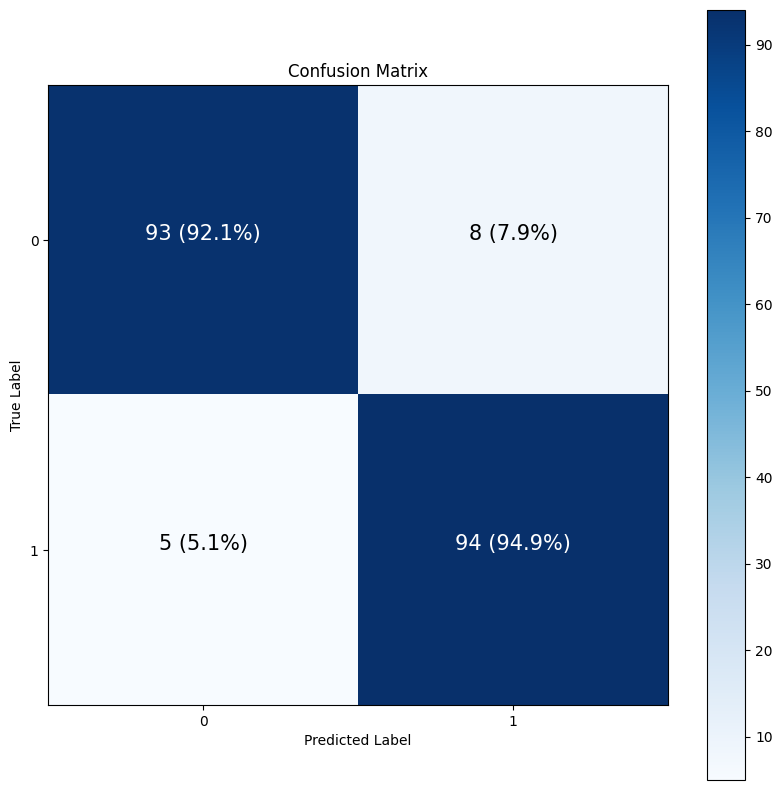

In [ ]:
# Pretifying our Confusion Matrix
import itertools

figsize = (10, 10)

# Create the confusion Matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # Normalise the Confusion Matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize = figsize)
# Create matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create Classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title = "Confusion Matrix", xlabel = "Predicted Label", ylabel = "True Label", xticks = np.arange(n_classes), yticks = np.arange(n_classes), xticklabels = labels, yticklabels = labels)

# Set threshold for different colors
threshold = (cm.max() + cm.min())/2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            color = "white" if cm[i,j] > threshold else "black", horizontalalignment = 'center',
           size = 15)
# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

In [ ]:
def plot_confusion_matrix(y_true, y_preds):
  figsize = (10, 10)

  # Create the confusion Matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # Normalise the Confusion Matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize = figsize)
  # Create matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # Create Classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = "Confusion Matrix", xlabel = "Predicted Label", ylabel = "True Label", xticks = np.arange(n_classes), yticks = np.arange(n_classes), xticklabels = labels, yticklabels = labels)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min())/2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              color = "white" if cm[i,j] > threshold else "black", horizontalalignment = 'center',
            size = 15)
  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

# Working with a larger Example (Multiclass Clssification)

Using TensorFlow's own `fashion_mnist` dataset.

In [ ]:
import tensorflow as tf
from keras.datasets import fashion_mnist

# The Data is already split into train and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Show the first training example
print(f"Training Sample:\n {train_data[0]}\n")
print(f"Training Label:\n {train_labels[0]}\n")

Training Sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

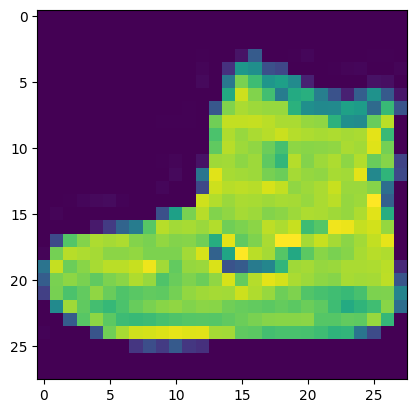

In [ ]:
# Plot a single Sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]) # Since the data is an image

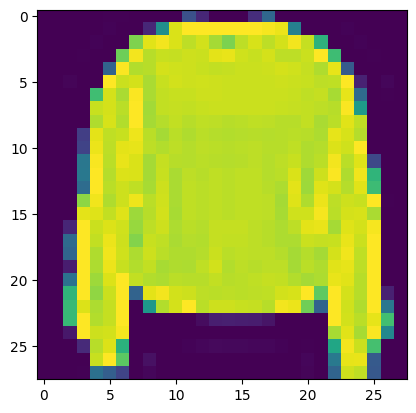

In [ ]:
# Trying another one
plt.imshow(train_data[7])

In [ ]:
# Check out samples labels
train_labels[7]

2

Text(0.5, 1.0, 'T-shirt/Top')

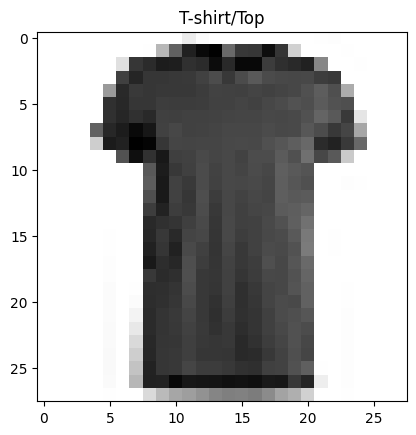

In [ ]:
# Create a small list of class names, to index it all
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Plot an example image qnd it's label
plt.imshow(train_data[17], cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]])


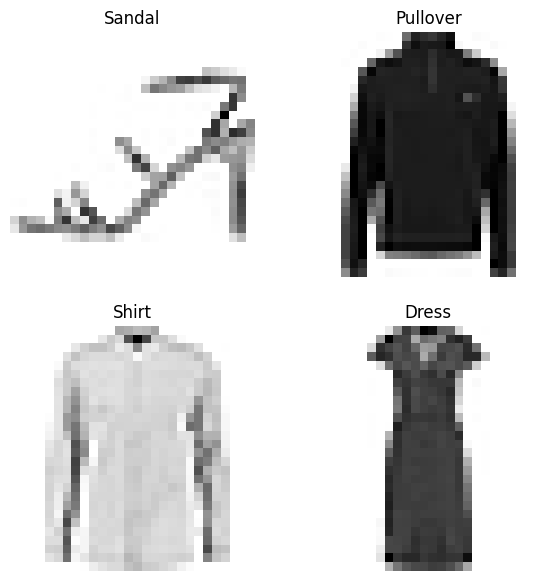

In [ ]:
# Plot multiple random images
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multiclass Classification Model

* Input shape = 28 x 28 (The shape of one Image)
* Output shape = 10 (one per class of clothing)
* loss function = tf.keras.losses.CategoricalCrossentropy()
* Output Layer activation = Softmax


In [ ]:
tf.random.set_seed(42)

# Create A Model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # To fix shape errors
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the Model
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"]) # CategoricalCrossentropy expects labels to be in One hot form

# Fit the Model
non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth = 10), epochs = 10, validation_data = (test_data, tf.one_hot(test_labels, depth = 10)))


Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.5540 - accuracy: 0.1134 - val_loss: 2.1081 - val_accuracy: 0.1881
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 1.9192 - accuracy: 0.2184 - val_loss: 1.7693 - val_accuracy: 0.2257
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.7232 - accuracy: 0.2540 - val_loss: 1.6901 - val_accuracy: 0.2660
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.6453 - accuracy: 0.2923 - val_loss: 1.5984 - val_accuracy: 0.3140
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5751 - accuracy: 0.3159 - val_loss: 1.5491 - val_accuracy: 0.3299
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5504 - accuracy: 0.3198 - val_loss: 1.5354 - val_accuracy: 0.3280
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5345 - accuracy: 0.3226 - val_loss: 1.5282 - val_accura

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural netwroks prefer the data to be scales (Normalized) between 0 and 1

In [ ]:
# We can get our training and test data between zero and one by dividing by the maximum
train_data_norm = train_data/ 255.0
test_data_norm = test_data/ 255.0

# Check the min and max
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Creating a better Model
tf.random.set_seed(42)

# Create A Model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # To fix shape errors
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the Model
model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"]) # CategoricalCrossentropy expects labels to be in One hot form

# Fit the Model
norm_history = model_12.fit(train_data_norm, tf.one_hot(train_labels, depth = 10),
                            epochs = 10, validation_data = (test_data_norm, tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3479 - accuracy: 0.5070 - val_loss: 0.9646 - val_accuracy: 0.6447
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8672 - accuracy: 0.6852 - val_loss: 0.8261 - val_accuracy: 0.7040
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7666 - accuracy: 0.7272 - val_loss: 0.7679 - val_accuracy: 0.7268
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7158 - accuracy: 0.7454 - val_loss: 0.7334 - val_accuracy: 0.7421
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6892 - accuracy: 0.7551 - val_loss: 0.7099 - val_accuracy: 0.7521
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6704 - accuracy: 0.7613 - val_loss: 0.7018 - val_accuracy: 0.7563
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6592 - accuracy: 0.7643 - val_loss: 0.6947 - val_accuracy:

<Axes: title={'center': 'Normalized Data'}>

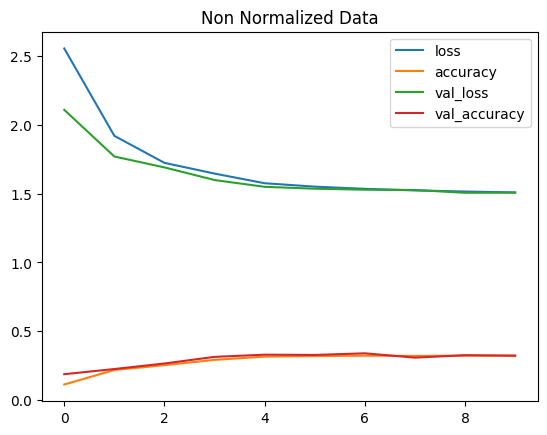

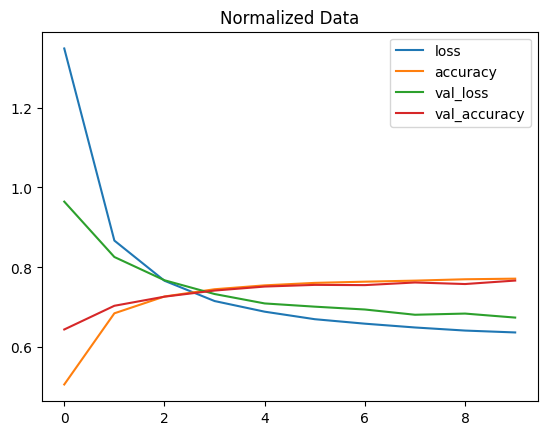

In [ ]:
# Comparing the Loss curves of non normalized and normalized data
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title = "Non Normalized Data")
pd.DataFrame(norm_history.history).plot(title = "Normalized Data")


## Finding the Ideal Learning Rate

In [ ]:
tf.random.set_seed(42)

# Creating a Model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compiling a Model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Create a learning-rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10**(epochs/20))

# Fitting the Model
find_lr_history = model_13.fit(train_data_norm, train_labels, epochs = 40, validation_data = (test_data_norm, test_labels), callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4561 - accuracy: 0.4505 - val_loss: 0.9976 - val_accuracy: 0.6390 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8393 - accuracy: 0.6906 - val_loss: 0.8019 - val_accuracy: 0.6958 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6984 - accuracy: 0.7530 - val_loss: 0.6768 - val_accuracy: 0.7584 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6250 - accuracy: 0.7797 - val_loss: 0.6401 - val_accuracy: 0.7725 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6000 - accuracy: 0.7873 - val_loss: 0.6215 - val_accuracy: 0.7820 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5853 - accuracy: 0.7926 - val_loss: 0.6044 - val_accuracy: 0.7895 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

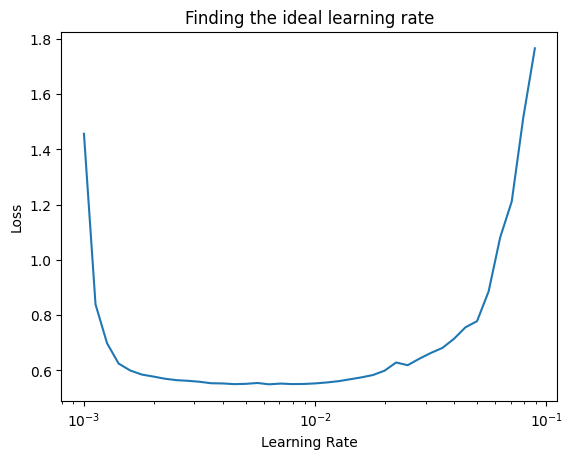

In [ ]:
# Plot the learning rate decay curves
lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# The ideal learning rate seems to be the default lr of Adam - 0.001
tf.random.set_seed(42)

# Create a Model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compiling the Model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                 metrics = ["accuracy"])

# Fitting the Model
history_14 = model_14.fit(train_data_norm, train_labels, epochs = 20, validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2767 - accuracy: 0.5334 - val_loss: 0.8961 - val_accuracy: 0.6741
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8198 - accuracy: 0.7052 - val_loss: 0.7915 - val_accuracy: 0.7249
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7433 - accuracy: 0.7339 - val_loss: 0.7444 - val_accuracy: 0.7423
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7035 - accuracy: 0.7489 - val_loss: 0.7222 - val_accuracy: 0.7485
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6798 - accuracy: 0.7555 - val_loss: 0.7069 - val_accuracy: 0.7486
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6626 - accuracy: 0.7602 - val_loss: 0.7467 - val_accuracy: 0.7391
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6509 - accuracy: 0.7640 - val_loss: 0.6814 - val_accuracy

## Evaluating our Model

In [ ]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np
figsize = (10, 10)

def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (20, 20)):
  # Create the confusion Matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # Normalise the Confusion Matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize = figsize)
  # Create matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

# Set classes Labels
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = "Confusion Matrix", xlabel = "Predicted Label", ylabel = "True Label", xticks = np.arange(n_classes), yticks = np.arange(n_classes), xticklabels = labels, yticklabels = labels)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min())/2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              color = "white" if cm[i,j] > threshold else "black", horizontalalignment = 'center',
            size = 15)
  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

In [ ]:
class_names

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [ ]:
# Let's make some predictions
y_probs = model_14.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.7001690e-07, 6.8366916e-08, 2.4185574e-11, 7.0588527e-08,
        4.7709704e-11, 3.8143229e-01, 2.4785921e-10, 7.5533807e-02,
        1.9792342e-05, 5.4301381e-01],
       [9.1873519e-02, 7.6243217e-05, 4.0816090e-01, 2.7440493e-03,
        8.9806998e-03, 2.5517282e-03, 4.0686917e-01, 4.0506373e-05,
        7.8703284e-02, 3.8912078e-09],
       [2.3953453e-08, 9.9761111e-01, 1.5672603e-12, 6.9941860e-05,
        3.5007146e-09, 8.0663704e-06, 8.5816479e-11, 2.3107841e-03,
        2.9340183e-10, 5.2129473e-16],
       [4.0389356e-10, 9.9854547e-01, 1.3244685e-15, 5.3487006e-06,
        1.0674932e-11, 4.9308170e-07, 1.8355609e-13, 1.4486399e-03,
        1.8265060e-12, 1.6708435e-18],
       [3.6082316e-02, 4.2286052e-04, 5.5978584e-01, 2.7493788e-03,
        2.3536822e-02, 1.3035733e-03, 3.6215717e-01, 1.0214081e-04,
        1.3859946e-02, 2.5345883e-09]], dtype=float32)

In [ ]:
# Convert all prediction probabilities to integers
y_preds = y_probs.argmax(axis = 1)

# View the first ten predictions
y_preds[:10]

array([9, 2, 1, 1, 2, 1, 4, 2, 5, 7])

In [ ]:
confusion_matrix(y_true = test_labels, y_pred = y_preds)

array([[706,   5,  42,  75,  12,   1, 141,   0,  18,   0],
       [  0, 932,   6,  39,  13,   2,   6,   1,   1,   0],
       [ 13,   1, 599,   7, 281,   1,  73,   0,  25,   0],
       [ 30,  36,  16, 790,  49,   4,  71,   0,   4,   0],
       [  1,   3, 108,  20, 815,   6,  24,   1,  22,   0],
       [  1,   1,   0,   1,   0, 855,   0,  69,  15,  58],
       [140,   2, 367,  48, 186,   3, 216,   1,  37,   0],
       [  0,   0,   0,   0,   0,  33,   0, 924,   0,  43],
       [  9,   3,   8,   6,   2,  13,  12,   3, 942,   2],
       [  0,   0,   0,   0,   0,  42,   0,  57,   1, 900]])

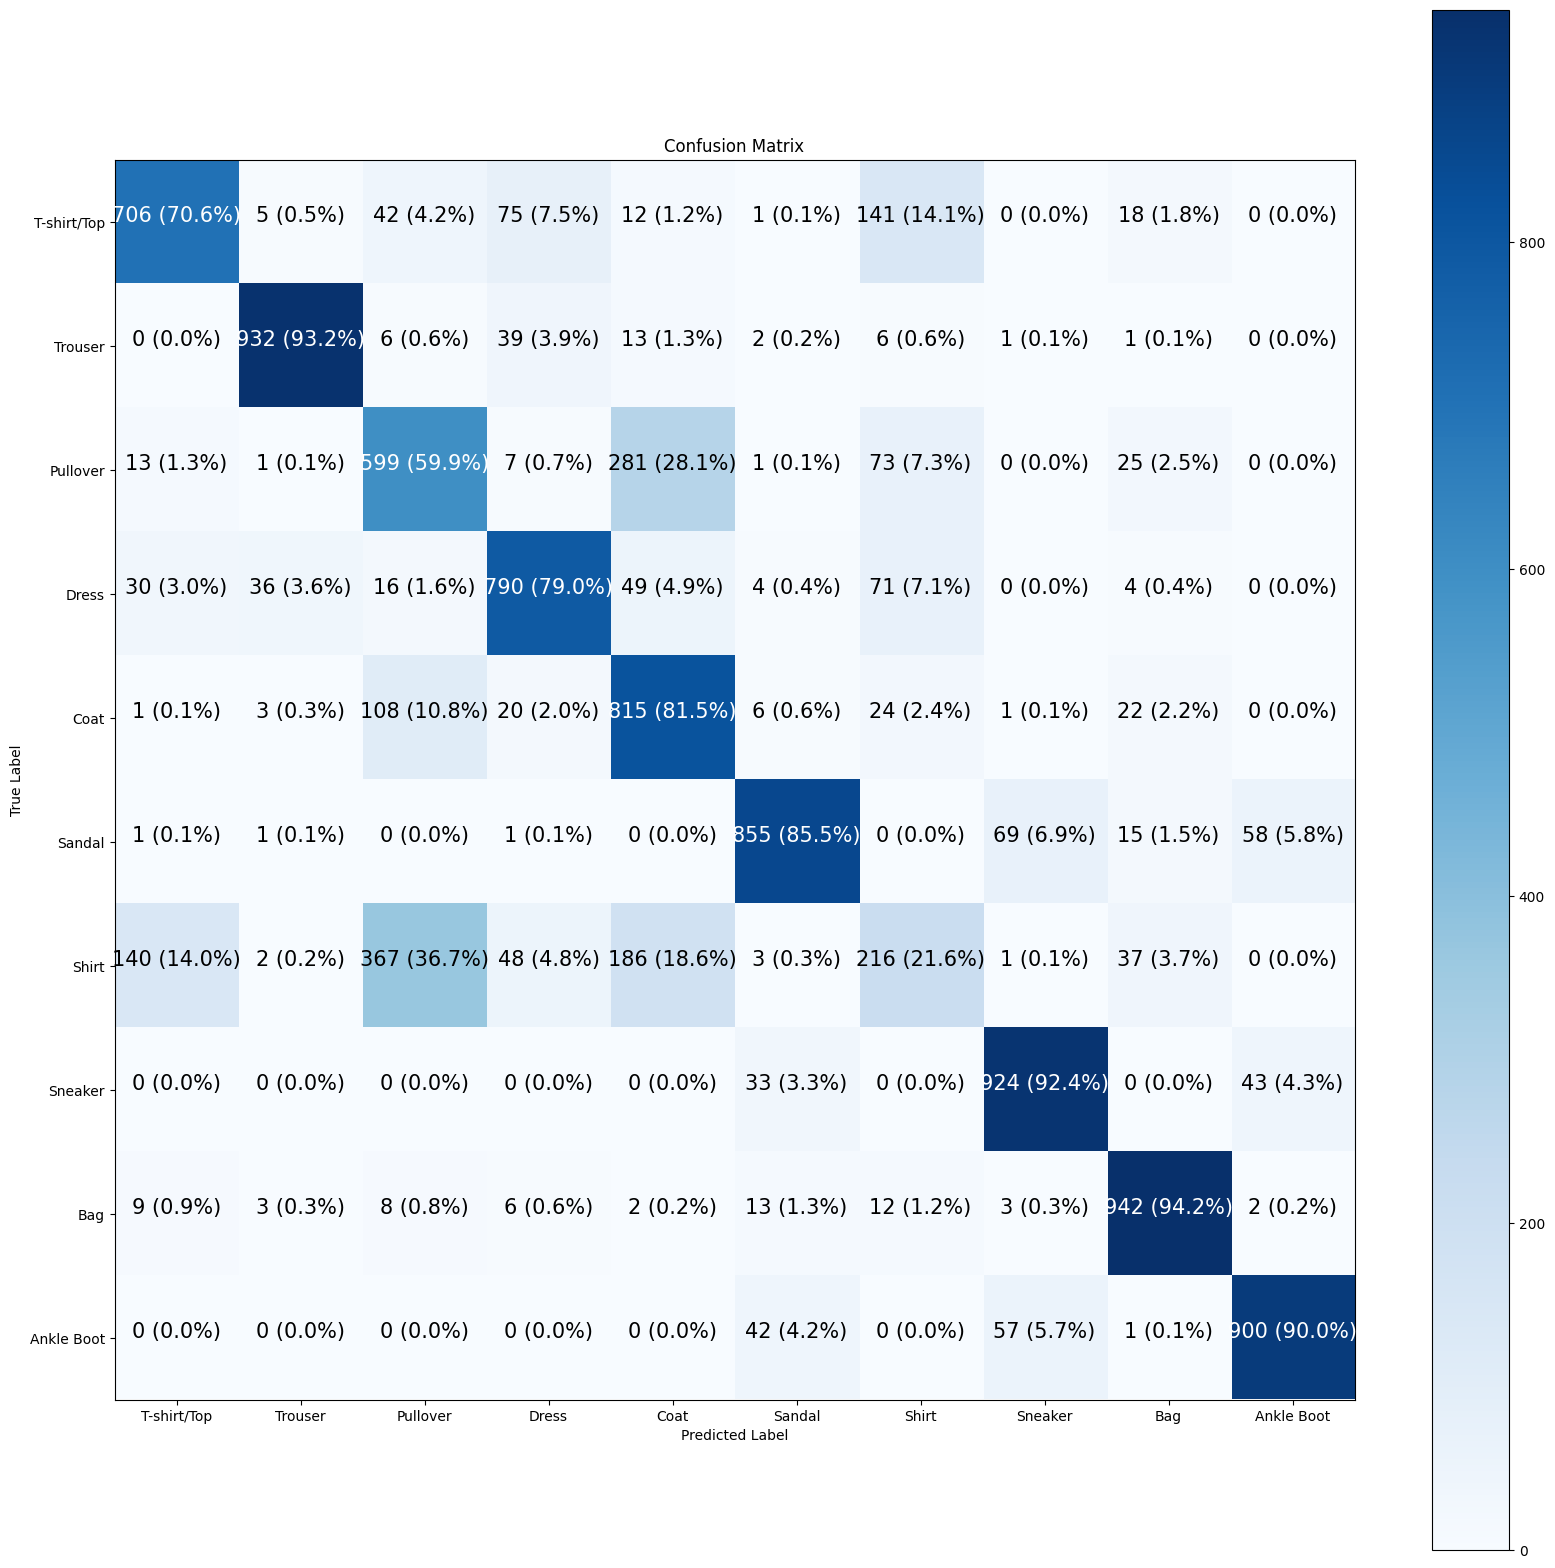

In [ ]:
make_confusion_matrix(test_labels, y_preds, classes = class_names)

In [ ]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_labels = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change colour of titles depending on if the prediction is right or wrong
  if pred_labels == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True : {})".format(pred_labels, 100*tf.reduce_max(pred_probs), true_label), color = color)

In [ ]:
# Check out a random image
plot_random_image(model=model_14, images = test_data_norm, true_labels = test_labels, classes = class_names)

## What patterns in our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Find the patterns by a particular layer using weights
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.59808826, -0.5392969 ,  0.5895049 , -0.0174613 ],
        [-0.23241197, -1.0231795 ,  0.5477831 , -0.04673633],
        [-1.3826421 , -1.220854  ,  1.1773937 ,  0.02210487],
        ...,
        [-0.06589513,  0.23975717,  0.13647103,  0.06280448],
        [ 0.56185234,  0.02700772, -0.22430725, -0.03053228],
        [-0.82376677,  0.557638  ,  0.5619111 ,  0.05580243]],
       dtype=float32),
 (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Biases
biases, biases.shape

(array([-0.24431928,  0.08136337,  0.69705504, -0.01983931], dtype=float32),
 (4,))

Every neuron has a bias matrix and each of these is paired with a weights matrix.

The bias vector get's initialized as a zeros (atleaset in the case of TensorFlow Dense layer).

It dictates how much the patterns within the corresponding weights matrix should influence the next layer.

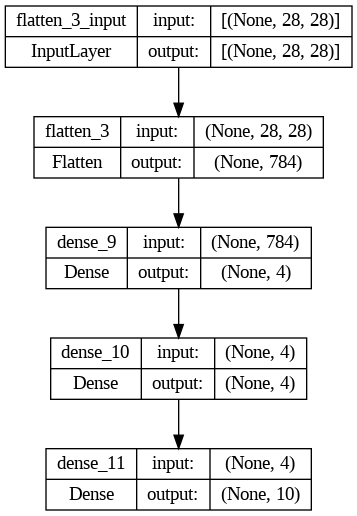

In [ ]:
tf.keras.utils.plot_model(model_14, show_shapes = True)